In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Input data files are in read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/twincitieslistings/listings 2.csv
/kaggle/input/denverairbnb/calendar.csv
/kaggle/input/denverairbnb/listings.csv
/kaggle/input/denverairbnb/statistical_neighborhoods.prj
/kaggle/input/denverairbnb/neighbourhoods.geojson
/kaggle/input/denverairbnb/statistical_neighborhoods.cpg
/kaggle/input/denverairbnb/statistical_neighborhoods.sbn
/kaggle/input/denverairbnb/reviews.csv
/kaggle/input/denverairbnb/statistical_neighborhoods.dbf
/kaggle/input/denverairbnb/statistical_neighborhoods.shp
/kaggle/input/denverairbnb/neighbourhoods.csv
/kaggle/input/denverairbnb/statistical_neighborhoods.shp.xml
/kaggle/input/denverairbnb/statistical_neighborhoods.shx
/kaggle/input/denverairbnb/statistical_neighborhoods.sbx
/kaggle/input/mpsopenairbnb/listings.csv
/kaggle/input/mpsopenairbnb/neighbourhoods.csv


In [2]:
df = pd.read_csv('/kaggle/input/mpsopenairbnb/listings.csv')

## Pre Processing

In [3]:
# Check for null values in the DataFrame
null_values = df.isnull().sum()

# Check if any null values exist
if null_values.any():
    print("Null values exist in the DataFrame:")
    print(null_values)
else:
    print("No null values found in the DataFrame.")

Null values exist in the DataFrame:
id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               5464
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                              281
minimum_nights                       0
number_of_reviews                    0
last_review                        972
reviews_per_month                  972
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           3701
dtype: int64


In [4]:
# Check the data types of columns in the dataframe
print(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


In [5]:
# Convert 'neighbourhood' column to American Spelling to Adderess issues
df['neighborhood'] = df['neighbourhood']

# Apply log transformation to price
df['log_price'] = np.log1p(df['price'])  # Using np.log1p to avoid log(0)

# Specify the columns to drop
columns_to_drop = ['name', 'host_id', 'host_name', 'neighbourhood_group', 'license']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

### **1. Data, Goals, and Tasks:**

In [6]:
#Task 1: Visualize the distribution of listing prices.

fig = px.histogram(df, x='price', nbins=50, title='Distribution of Listing Prices')
fig.update_layout(xaxis_title='Price Per Night', yaxis_title='Frequency', showlegend=False)
# Set the range of the x-axis to start from zero
fig.update_xaxes(range=[0, df['price'].max()])

fig.show()

In [7]:
#Task 2: Analyze the correlation between reviews and listing prices.

fig = px.scatter(df, x='number_of_reviews', y='price', title='Correlation between Number of Reviews and Prices')
fig.update_layout(xaxis_title='Number of Reviews (Log Scale)', yaxis_title='Price', showlegend=False, yaxis_type='log')
fig.show()

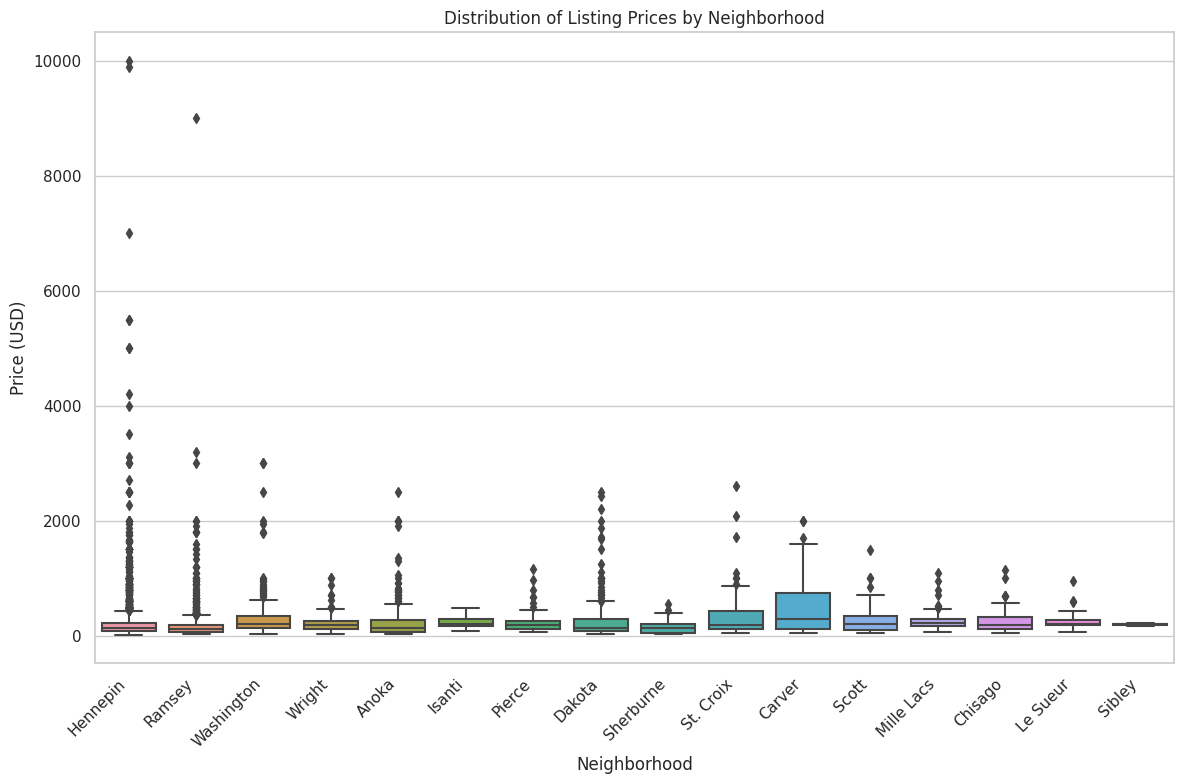

In [8]:
#Task 3 Create a box plot of listing prices by neighborhood

# Set the style of seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.boxplot(x='neighborhood', y='price', data=df)
plt.title('Distribution of Listing Prices by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

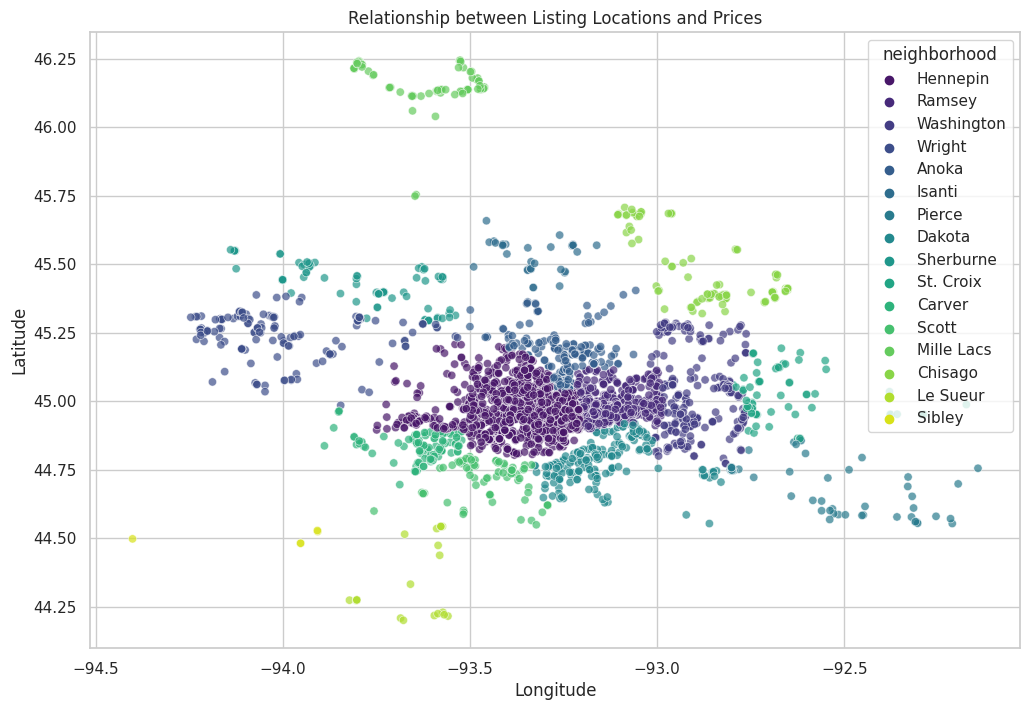

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [9]:
# Visualize the geographical distribution of listings; relationship between locations neighborhood
# to do ad selection to be able to select one neighborhood with the other being low lighted
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='longitude', y='latitude', hue='neighborhood', data=df, palette='viridis', alpha=0.7)
plt.title('Relationship between Listing Locations and Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# Create an interactive scatter plot with Plotly
fig = px.scatter(df, x='longitude', y='latitude', color='neighborhood',
                 color_continuous_scale='viridis',
                 hover_name='neighborhood', opacity=0.7)

# Update layout to add title and axis labels
fig.update_layout(title='Relationship between Listing Locations and Neighborhoods',
                  xaxis_title='Longitude', yaxis_title='Latitude')

# Add interaction for selecting a single neighborhood
fig.update_traces(selected=dict(marker=dict(opacity=1)), unselected=dict(marker=dict(opacity=0.1)))

# Show the interactive plot
fig.show()


In [10]:
# Create an interactive scatter plot with Plotly
fig = px.scatter(df, x='longitude', y='latitude', color='neighborhood',
                 color_continuous_scale='viridis',
                 hover_name='neighborhood', opacity=0.7)

# Update layout to add title and axis labels
fig.update_layout(title='Relationship between Listing Locations and Neighborhoods',
                  xaxis_title='Longitude', yaxis_title='Latitude')

# Add interaction for selecting a single neighborhood
fig.update_traces(selected=dict(marker=dict(opacity=1)), unselected=dict(marker=dict(opacity=0.1)))

# Show the interactive plot
fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [11]:
#Refacotr to have differing shades of gray for price

# Create an interactive scatter plot with Plotly
fig = px.scatter(df, x='longitude', y='latitude', color='log_price',
                 color_continuous_scale='gray',
                 hover_name='neighborhood', opacity=0.7)

# Update layout to add title and axis labels
fig.update_layout(title='Relationship between Listing Locations and Prices (Log Scale)',
                  xaxis_title='Longitude', yaxis_title='Latitude')

# Add interaction for selecting a single neighborhood
fig.update_traces(selected=dict(marker=dict(opacity=1)), unselected=dict(marker=dict(opacity=0.1)))

# Show the interactive plot
fig.show()